# 1. Situation

Every hospital has a certain amount of staff and beds to its availability. In order to take care of its patients, hospitals need to be able to efficiently handle the influx of those in need, this included providing a sufficient amount of beds for its patients. With this dataset, we will try to predict how many pedestrians and cyclists will come in on a given day based on elements such as weather conditions and the number of people involved.

# 2.	Data Understanding

With the dataset provided, we can try to predict how many patients will come in on a given day based on elements such as Collision Data for Seattle from 2004 to 2020 was provided via this link:
https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Datasets:

PEDCOUNT
PEDCYLCOUNT
WEATHER
ROADCOND
LIGHTCOND
We remove the other columns, as well as the elements in the columns that are not relevant to our project, such as blank spaces or fields noted as “Unknown”. All remaining elements are assigned a number which carries a weight and will help us to determine the degree of preparedness the hospital needs in order to guarantee care of incoming patients. The assumption is that bad weather conditions will result in more accidents. As such, they will also be assigned a larger number.

# 3.	Model Evaluation

We will use linear regression to evaluate the model. Linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [61]:
df = pd.read_csv(r"C:\Users\khourchg\Documents\Training\python\coursera\capstone\Data-Collisions.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
df.head()
print(df.columns)

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')


In [63]:
df["TOTALPED"] = df["PEDCOUNT"] + df["PEDCYLCOUNT"]

In [64]:
new_df = df[["TOTALPED","WEATHER","ROADCOND","LIGHTCOND"]]

In [65]:
new_df.WEATHER.unique()
new_df.TOTALPED.unique()
new_df.ROADCOND.unique()
new_df.LIGHTCOND.unique()


array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       nan, 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'], dtype=object)

In [66]:
for colname in ["TOTALPED", "WEATHER", "ROADCOND", "LIGHTCOND"]:
    for replacedval in ["","Other","Unknown", "Dark - Unknown Lighting"]:
        new_df[colname].replace(replacedval,np.nan,inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [67]:
new_df.dropna(inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
new_df["WEATHER"].replace("Clear",1,inplace=True)
new_df["WEATHER"].replace("Partly Cloudy",2,inplace=True)
new_df["WEATHER"].replace("Overcast",3,inplace=True)
new_df["WEATHER"].replace("Severe Crosswind",4,inplace=True)
new_df["WEATHER"].replace("Raining",5,inplace=True)
new_df["WEATHER"].replace("Blowing Sand/Dirt",6,inplace=True)
new_df["WEATHER"].replace("Fog/Smog/Smoke",7,inplace=True)
new_df["WEATHER"].replace("Sleet/Hail/Freezing Rain",8,inplace=True)
new_df["WEATHER"].replace("Snowing",9,inplace=True)
new_df["WEATHER"].replace("Partly Cloudy",2,inplace=True)

new_df["ROADCOND"].replace("Dry",1,inplace=True)
new_df["ROADCOND"].replace("Sand/Mud/Dirt",2,inplace=True)
new_df["ROADCOND"].replace("Wet",3,inplace=True)
new_df["ROADCOND"].replace("Standing Water",4,inplace=True)
new_df["ROADCOND"].replace("Snow/Slush",5,inplace=True)
new_df["ROADCOND"].replace("Ice",6,inplace=True)
new_df["ROADCOND"].replace("Oil",7,inplace=True)

new_df["LIGHTCOND"].replace("Daylight",1,inplace=True)
new_df["LIGHTCOND"].replace("Dawn",2,inplace=True)
new_df["LIGHTCOND"].replace("Dusk",3,inplace=True)
new_df["LIGHTCOND"].replace("Dark - Street Lights On",4,inplace=True)
new_df["LIGHTCOND"].replace("Dark - No Street Lights",5,inplace=True)
new_df["LIGHTCOND"].replace("Dark - Street Lights Off",5,inplace=True)



print(new_df)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


        TOTALPED  WEATHER  ROADCOND  LIGHTCOND
0              0        3         3          1
1              0        5         3          4
2              0        3         1          1
3              0        1         1          1
4              0        5         3          1
5              0        1         1          1
6              0        5         3          1
7              1        1         1          1
8              0        1         1          1
9              0        1         1          1
10             0        3         1          1
11             0        1         1          1
12             0        5         3          4
13             0        5         3          5
14             0        1         1          4
16             0        3         1          1
17             0        3         1          1
18             0        1         1          1
20             0        1         1          4
21             0        1         1          1
22           

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBCFB8F438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CBD1024F98>]], dtype=object)

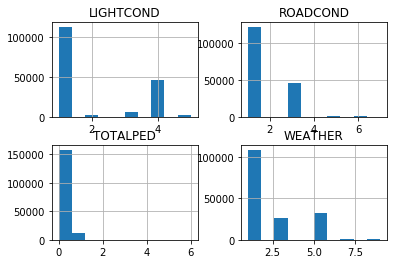

In [69]:
new_df.hist()

In [70]:
X = new_df[["WEATHER", "ROADCOND", "LIGHTCOND"]]
y = new_df[["TOTALPED"]]

In [71]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
y_pred = regressor.predict(X_test)

In [95]:
y_test_list=y_test['TOTALPED'].tolist()
y_pred_list=y_pred.tolist()
df_predict = pd.DataFrame({'Actual': y_test_list, 'Predicted': y_pred_list})
df_predict

,Actual,Predicted
0,0,[0.07332947179563003]
1,0,[0.059301973670005906]
2,0,[0.07578393296824612]
3,0,[0.067542953319126]
4,0,[0.07578393296824612]
5,0,[0.06674185655547053]
6,1,[0.07332947179563003]
7,0,[0.0741305685592855]
8,0,[0.07578393296824612]
9,0,[0.07578393296824612]


In [107]:
pred_df = pd.DataFrame({"WEATHER": [1],"ROADCOND": [1], "LIGHTCOND": [1]})
print(pred_df)
new_predict = regressor.predict(pred_df)
print(new_predict)

   LIGHTCOND  ROADCOND  WEATHER
0          1         1        1
[[ 0.07578393]]


In [103]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


<class 'numpy.ndarray'>


In [94]:
for row in y_pred:
    print(row)

[ 0.07332947]
[ 0.05930197]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.06674186]
[ 0.07332947]
[ 0.07413057]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07332947]
[ 0.0667248]
[ 0.06754295]
[ 0.07332947]
[ 0.0659237]
[ 0.07578393]
[ 0.07332947]
[ 0.06508849]
[ 0.07738613]
[ 0.07332947]
[ 0.0642874]
[ 0.07578393]
[ 0.06508849]
[ 0.07658503]
[ 0.07658503]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07658503]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07413057]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.0634863]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.06508849]
[ 0.07658503]
[ 0.07578393]
[ 0.07332947]
[ 0.06508849]
[ 0.06508849]
[ 0.07332947]
[ 0.07332947]
[ 0.07578393]
[ 0.075783

[ 0.07332947]
[ 0.07578393]
[ 0.07332947]
[ 0.07413057]
[ 0.07578393]
[ 0.07578393]
[ 0.06427034]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.0634863]
[ 0.07658503]
[ 0.07658503]
[ 0.07578393]
[ 0.07332947]
[ 0.06508849]
[ 0.07578393]
[ 0.07658503]
[ 0.06508849]
[ 0.07578393]
[ 0.06754295]
[ 0.06508849]
[ 0.07578393]
[ 0.07414763]
[ 0.07578393]
[ 0.07496578]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.06674186]
[ 0.06508849]
[ 0.06594076]
[ 0.07332947]
[ 0.07578393]
[ 0.06510555]
[ 0.0642874]
[ 0.07413057]
[ 0.07578393]
[ 0.06754295]
[ 0.07413057]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.0642874]
[ 0.05689868]
[ 0.06508849]
[ 0.06508849]
[ 0.07332947]
[ 0.06594076]
[ 0.07332947]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07414763]
[ 0.07332947]
[ 0.07414763]
[ 0.07578

[ 0.07658503]
[ 0.07413057]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07658503]
[ 0.06510555]
[ 0.07578393]
[ 0.06674186]
[ 0.07658503]
[ 0.07578393]
[ 0.06508849]
[ 0.06674186]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07332947]
[ 0.06508849]
[ 0.07413057]
[ 0.07658503]
[ 0.06674186]
[ 0.06508849]
[ 0.06508849]
[ 0.07332947]
[ 0.06754295]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.06674186]
[ 0.0642874]
[ 0.07578393]
[ 0.07413057]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.06508849]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07414763]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.06594076]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.0634863]
[ 0.0634863]
[ 0.07578393]
[ 0.07494872]
[ 0.07332947]
[ 0.07332947]
[ 0.06427034]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.06754295]
[ 0.06754295]
[ 0.07332947]
[ 0.06754295]
[ 0.07332947]
[ 0.07413057]
[ 0.07496578]
[ 0.07332

[ 0.06590665]
[ 0.07332947]
[ 0.07658503]
[ 0.051176]
[ 0.07414763]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.06754295]
[ 0.06508849]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07413057]
[ 0.06427034]
[ 0.07332947]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07414763]
[ 0.07658503]
[ 0.07414763]
[ 0.07332947]
[ 0.07658503]
[ 0.0634863]
[ 0.06754295]
[ 0.06754295]
[ 0.06669069]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07414763]
[ 0.07578393]
[ 0.07332947]
[ 0.07658503]
[ 0.06594076]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07251132]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07332947]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07414763]
[ 0.06510555]
[ 0.07251132]
[ 0.06428

[ 0.07658503]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.0642874]
[ 0.06754295]
[ 0.06508849]
[ 0.0642874]
[ 0.07578393]
[ 0.07414763]
[ 0.07332947]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07332947]
[ 0.07332947]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.06427034]
[ 0.06508849]
[ 0.07496578]
[ 0.07332947]
[ 0.07578393]
[ 0.06754295]
[ 0.06508849]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.06754295]
[ 0.06508849]
[ 0.0675

[ 0.07578393]
[ 0.07578393]
[ 0.07414763]
[ 0.07578393]
[ 0.06674186]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07658503]
[ 0.06754295]
[ 0.07414763]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07332947]
[ 0.06754295]
[ 0.06754295]
[ 0.07414763]
[ 0.06674186]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07251132]
[ 0.06508849]
[ 0.07658503]
[ 0.07578393]
[ 0.07414763]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.06346924]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07414763]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.06508849]
[ 0.0642874]
[ 0.07578393]
[ 0.07332947]
[ 0.07332947]
[ 0.07578393]
[ 0.06674186]
[ 0.07414763]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.0642874]
[ 0.07332947]
[ 0.07496578]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07658503]
[ 0.0552

[ 0.06508849]
[ 0.07332947]
[ 0.06508849]
[ 0.06754295]
[ 0.06594076]
[ 0.07332947]
[ 0.06508849]
[ 0.07332947]
[ 0.07332947]
[ 0.07578393]
[ 0.07658503]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07413057]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07332947]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.06594076]
[ 0.051176]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.06594076]
[ 0.07658503]
[ 0.07578393]
[ 0.07332947]
[ 0.06508849]
[ 0.07658503]
[ 0.06346924]
[ 0.0642874]
[ 0.07578393]
[ 0.05192593]
[ 0.0642874]
[ 0.07578393]
[ 0.07332947]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.06594076]
[ 0.06674186]
[ 0.07578393]
[ 0.06508849]
[ 0.06508849]
[ 0.07658503]
[ 0.07578393]
[ 0.07332947]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07496578]
[ 0.06594076]
[ 0.07658503]
[ 0.07414763]
[ 0.07578393]
[ 0.07578393]
[ 0.06510555]
[ 0.067542

[ 0.05689868]
[ 0.07414763]
[ 0.07578393]
[ 0.07331241]
[ 0.07332947]
[ 0.06508849]
[ 0.0642874]
[ 0.07578393]
[ 0.06754295]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.06674186]
[ 0.07332947]
[ 0.07578393]
[ 0.06590665]
[ 0.04872154]
[ 0.07251132]
[ 0.06674186]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07332947]
[ 0.07332947]
[ 0.06508849]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.05602936]
[ 0.07578393]
[ 0.07578393]
[ 0.07251132]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.0667248]
[ 0.07332947]
[ 0.07332947]
[ 0.07658503]
[ 0.07578393]
[ 0.06674186]
[ 0.06754295]
[ 0.07332947]
[ 0.06508849]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.05192593]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.0765

[ 0.06508849]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.06754295]
[ 0.07332947]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.06754295]
[ 0.06754295]
[ 0.07578393]
[ 0.07413057]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07332947]
[ 0.07658503]
[ 0.06508849]
[ 0.07658503]
[ 0.07658503]
[ 0.07578393]
[ 0.07332947]
[ 0.06508849]
[ 0.07578393]
[ 0.0642874]
[ 0.06508849]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07251132]
[ 0.07578393]
[ 0.06674186]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07414763]
[ 0.07578393]
[ 0.06754295]
[ 0.07414763]
[ 0.06754295]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.0642874]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07332947]
[ 0.06674186]
[ 0.07414763]
[ 0.06508849]
[ 0.06674186]
[ 0.07658503]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07332947]
[ 0.07332947]
[ 0.0757

[ 0.07332947]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07251132]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.0634863]
[ 0.07251132]
[ 0.07332947]
[ 0.07578393]
[ 0.07414763]
[ 0.0642874]
[ 0.07658503]
[ 0.06754295]
[ 0.07414763]
[ 0.07332947]
[ 0.07332947]
[ 0.07578393]
[ 0.06754295]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07332947]
[ 0.04952264]
[ 0.07578393]
[ 0.07414763]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07332947]
[ 0.06674186]
[ 0.06508849]
[ 0.07578393]
[ 0.07332947]
[ 0.06508849]
[ 0.07578393]
[ 0.0642874]
[ 0.06754295]
[ 0.07496578]
[ 0.07578393]
[ 0.07658503]
[ 0.07332947]
[ 0.06590665]
[ 0.06594076]
[ 0.06754295]
[ 0.06674186]
[ 0.07573276]
[ 0.07332947]
[ 0.07332947]
[ 0.07576688]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07414763]
[ 0.06754295]
[ 0.06674186]
[ 0.07414763]
[ 0.07658503]
[ 0.06588959]
[ 0.07578393]
[ 0.0642874]
[ 0.0667248]
[ 0.06674186]
[ 0.0642874]
[ 0.06754295]
[ 0.06754295]
[ 0.07578393

[ 0.07413057]
[ 0.07578393]
[ 0.07578393]
[ 0.07413057]
[ 0.06508849]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06674186]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.0667248]
[ 0.07578393]
[ 0.04952264]
[ 0.06754295]
[ 0.06674186]
[ 0.06754295]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07413057]
[ 0.07578393]
[ 0.07578393]
[ 0.06674186]
[ 0.07658503]
[ 0.07332947]
[ 0.07414763]
[ 0.06754295]
[ 0.07578393]
[ 0.07658503]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.06674186]
[ 0.07332947]
[ 0.07578393]
[ 0.07576688]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07251132]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07414763]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.067

[ 0.06427034]
[ 0.07578393]
[ 0.07658503]
[ 0.07414763]
[ 0.06674186]
[ 0.06594076]
[ 0.07332947]
[ 0.07578393]
[ 0.06508849]
[ 0.07332947]
[ 0.0659237]
[ 0.07578393]
[ 0.07332947]
[ 0.06508849]
[ 0.07576688]
[ 0.07578393]
[ 0.06754295]
[ 0.07332947]
[ 0.07332947]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07658503]
[ 0.06754295]
[ 0.07658503]
[ 0.07332947]
[ 0.07658503]
[ 0.06754295]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07331241]
[ 0.07578393]
[ 0.07413057]
[ 0.06508849]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07332947]
[ 0.06508849]
[ 0.07332947]
[ 0.07578393]
[ 0.06754295]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.06594076]
[ 0.07578393]
[ 0.07578393]
[ 0.07414763]
[ 0.07578393]
[ 0.0634863]
[ 0.07578393]
[ 0.07578393]
[ 0.07413057]
[ 0.06754295]
[ 0.07658503]
[ 0.07332947]
[ 0.07578393]
[ 0.06754295]
[ 0.06754295]
[ 0.0757

[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.07413057]
[ 0.07414763]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.06508849]
[ 0.06427034]
[ 0.06508849]
[ 0.07332947]
[ 0.07332947]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.06754295]
[ 0.0642874]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07332947]
[ 0.06754295]
[ 0.07332947]
[ 0.06674186]
[ 0.07413057]
[ 0.06590665]
[ 0.07493167]
[ 0.06508849]
[ 0.06754295]
[ 0.07578393]
[ 0.06510555]
[ 0.07578393]
[ 0.07578393]
[ 0.07413057]
[ 0.06754295]
[ 0.06754295]
[ 0.06508849]
[ 0.07332947]
[ 0.07332947]
[ 0.07331241]
[ 0.07576688]
[ 0.0642874]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.06508849]
[ 0.06754295]
[ 0.07413057]
[ 0.07738613]
[ 0.07578393]
[ 0.06508849]
[ 0.07332947]
[ 0.06754295]
[ 0.06754295]
[ 0.0757

[ 0.07578393]
[ 0.05444422]
[ 0.06754295]
[ 0.07331241]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07658503]
[ 0.06754295]
[ 0.07578393]
[ 0.06754295]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07414763]
[ 0.06510555]
[ 0.07413057]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.0519771]
[ 0.07251132]
[ 0.06754295]
[ 0.06914515]
[ 0.07332947]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.06674186]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.06674186]
[ 0.06754295]
[ 0.07332947]
[ 0.06754295]
[ 0.07578393]
[ 0.07413057]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.0634863]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07251132]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07818722]
[ 0.06512261]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.06754295]
[ 0.07578393]
[ 0.06508849]
[ 0.07658503]
[ 0.07332947]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.0667

[ 0.07332947]
[ 0.07578393]
[ 0.0642874]
[ 0.06594076]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07332947]
[ 0.06754295]
[ 0.07578393]
[ 0.05684751]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07332947]
[ 0.06588959]
[ 0.07658503]
[ 0.07578393]
[ 0.07658503]
[ 0.06508849]
[ 0.07578393]
[ 0.07251132]
[ 0.06754295]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07496578]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07658503]
[ 0.07332947]
[ 0.06508849]
[ 0.06590665]
[ 0.06510555]
[ 0.06674186]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.0642874]
[ 0.07578393]
[ 0.0642874]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07413057]
[ 0.06754295]
[ 0.06508849]
[ 0.07578393]
[ 0.07414763]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07332947]
[ 0.07578393]
[ 0.07332947]
[ 0.07658503]
[ 0.07578393]
[ 0.07578

[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.06754295]
[ 0.07332947]
[ 0.07658503]
[ 0.07658503]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.0642874]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06674186]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07413057]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07414763]
[ 0.07578393]
[ 0.07578393]
[ 0.0642874]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.06266814]
[ 0.06674186]
[ 0.07578393]
[ 0.06508849]
[ 0.07658503]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.06754295]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.06594076]
[ 0.06508849]
[ 0.06508849]
[ 0.07658503]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07658503]
[ 0.07332947]
[ 0.0650

[ 0.06754295]
[ 0.06508849]
[ 0.07332947]
[ 0.07578393]
[ 0.0642874]
[ 0.06508849]
[ 0.07658503]
[ 0.07578393]
[ 0.07332947]
[ 0.06754295]
[ 0.07332947]
[ 0.07332947]
[ 0.07658503]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.05115894]
[ 0.07578393]
[ 0.06508849]
[ 0.07332947]
[ 0.07332947]
[ 0.07578393]
[ 0.06674186]
[ 0.06754295]
[ 0.07332947]
[ 0.0642874]
[ 0.07578393]
[ 0.07413057]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.06754295]
[ 0.07332947]
[ 0.07332947]
[ 0.07332947]
[ 0.07332947]
[ 0.06754295]
[ 0.0642874]
[ 0.07658503]
[ 0.07578393]
[ 0.0642874]
[ 0.07578393]
[ 0.06594076]
[ 0.07332947]
[ 0.0642874]
[ 0.07332947]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.07414763]
[ 0.06508849]
[ 0.07332947]
[ 0.06674186]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07332947]
[ 0.07332947]
[ 0.06508849]
[ 0.07578393]
[ 0.06512261]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.0757839

[ 0.06508849]
[ 0.06754295]
[ 0.06754295]
[ 0.06508849]
[ 0.07578393]
[ 0.06508849]
[ 0.07332947]
[ 0.06508849]
[ 0.0642874]
[ 0.07332947]
[ 0.04785661]
[ 0.07658503]
[ 0.07332947]
[ 0.07332947]
[ 0.07578393]
[ 0.0642874]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07658503]
[ 0.06590665]
[ 0.07413057]
[ 0.07578393]
[ 0.07251132]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.06508849]
[ 0.06508849]
[ 0.06754295]
[ 0.07332947]
[ 0.07658503]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07618448]
[ 0.06674186]
[ 0.07578393]
[ 0.07578393]
[ 0.07251132]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07496578]
[ 0.06674186]
[ 0.06594076]
[ 0.06754295]
[ 0.06508849]
[ 0.06674186]
[ 0.06754295]
[ 0.07414763]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07576688]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.0642874]
[ 0.07578

[ 0.07494872]
[ 0.06754295]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.0642874]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.06508849]
[ 0.0634863]
[ 0.06754295]
[ 0.07578393]
[ 0.06427034]
[ 0.06508849]
[ 0.07578393]
[ 0.06674186]
[ 0.07414763]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.06754295]
[ 0.06754295]
[ 0.06754295]
[ 0.06508849]
[ 0.07332947]
[ 0.0634863]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.06754295]
[ 0.07332947]
[ 0.06590665]
[ 0.07578393]
[ 0.06508849]
[ 0.07332947]
[ 0.07578393]
[ 0.07332947]
[ 0.0642874]
[ 0.06508849]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.06754295]
[ 0.06508849]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07332947]
[ 0.06508849]
[ 0.07332947]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.0642874]
[ 0.07332947]
[ 0.07332947]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07656797]
[ 0.06754295]
[ 0.0642703

[ 0.06754295]
[ 0.07658503]
[ 0.07578393]
[ 0.07658503]
[ 0.0634863]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.05930197]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.06754295]
[ 0.06508849]
[ 0.07332947]
[ 0.07413057]
[ 0.0659237]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07698558]
[ 0.06594076]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07414763]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.0642874]
[ 0.07658503]
[ 0.06508849]
[ 0.07414763]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07413057]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578

[ 0.07578393]
[ 0.07658503]
[ 0.07332947]
[ 0.07332947]
[ 0.07413057]
[ 0.06754295]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.06590665]
[ 0.06674186]
[ 0.07658503]
[ 0.07578393]
[ 0.0634863]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06674186]
[ 0.07332947]
[ 0.07578393]
[ 0.07332947]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07413057]
[ 0.06754295]
[ 0.07414763]
[ 0.07658503]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07413057]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07494872]
[ 0.07578393]
[ 0.07332947]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07414763]
[ 0.07494872]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.0634863]
[ 0.07578393]
[ 0.07494872]
[ 0.06508849]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06427034]
[ 0.07578393]
[ 0.07578393]
[ 0.0667

[ 0.07578393]
[ 0.07332947]
[ 0.07658503]
[ 0.07332947]
[ 0.07578393]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.0642874]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.05930197]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06594076]
[ 0.07578393]
[ 0.06547198]
[ 0.07332947]
[ 0.07578393]
[ 0.06346924]
[ 0.07658503]
[ 0.0659237]
[ 0.06674186]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.0642874]
[ 0.06427034]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.07413057]
[ 0.07573276]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07413057]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.06754295]
[ 0.07332

[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.06016691]
[ 0.07413057]
[ 0.07658503]
[ 0.07413057]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.06674186]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.0634863]
[ 0.07658503]
[ 0.06594076]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07414763]
[ 0.07576688]
[ 0.07578393]
[ 0.07413057]
[ 0.07332947]
[ 0.07332947]
[ 0.07578393]
[ 0.06590665]
[ 0.07578393]
[ 0.07413057]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07332947]
[ 0.07413057]
[ 0.07578393]
[ 0.06754295]
[ 0.07251132]
[ 0.07332947]
[ 0.07578393]
[ 0.07658503]
[ 0.0634863]
[ 0.06508849]
[ 0.07658503]
[ 0.07413057]
[ 0.06427034]
[ 0.06346924]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.07332947]
[ 0.06754295]
[ 0.07578393]
[ 0.07251132]
[ 0.07578393]
[ 0.07658503]
[ 0.07658503]
[ 0.07332947]
[ 0.07332947]
[ 0.07332947]
[ 0.0757

[ 0.0642874]
[ 0.06427034]
[ 0.07332947]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06674186]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.0642874]
[ 0.07578393]
[ 0.06594076]
[ 0.07578393]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.0659237]
[ 0.07332947]
[ 0.07413057]
[ 0.07332947]
[ 0.07578393]
[ 0.0642874]
[ 0.07578393]
[ 0.07578393]
[ 0.07578393]
[ 0.06590665]
[ 0.06508849]
[ 0.06510555]
[ 0.06754295]
[ 0.07578393]
[ 0.07332947]
[ 0.07332947]
[ 0.06588959]
[ 0.07578393]
[ 0.07658503]
[ 0.07578393]
[ 0.06594076]
[ 0.07578393]
[ 0.0642874]
[ 0.07332947]
[ 0.07658503]
[ 0.07578393]
[ 0.07578393]
[ 0.06754295]
[ 0.06508849]
[ 0.06508849]
[ 0.07578393]
[ 0.07578393]
[ 0.07658503]
[ 0.07332947]
[ 0.06674186]
[ 0.06262137]
[ 0.07578393]
[ 0.07578393]
[ 0.0757839

In [89]:
y_test['TOTALPED'][0:20
                  ]

161513    0
45328     0
107226    0
172807    0
108773    0
19339     0
9642      1
109416    0
113202    0
56933     0
144539    0
10558     0
146117    0
96181     0
130597    0
24538     0
157629    0
93706     0
159552    0
1626      0
Name: TOTALPED, dtype: int64

# 4. Conclusion

After model preparation and testing, we can conclude that our model is somewhat accurate. However, our initial assumption that bad weather conditions result into more traffic acciden
